In [1]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models

In [2]:
print(tf.__version__)
print(tf.test.gpu_device_name())

1.13.1
/device:GPU:0


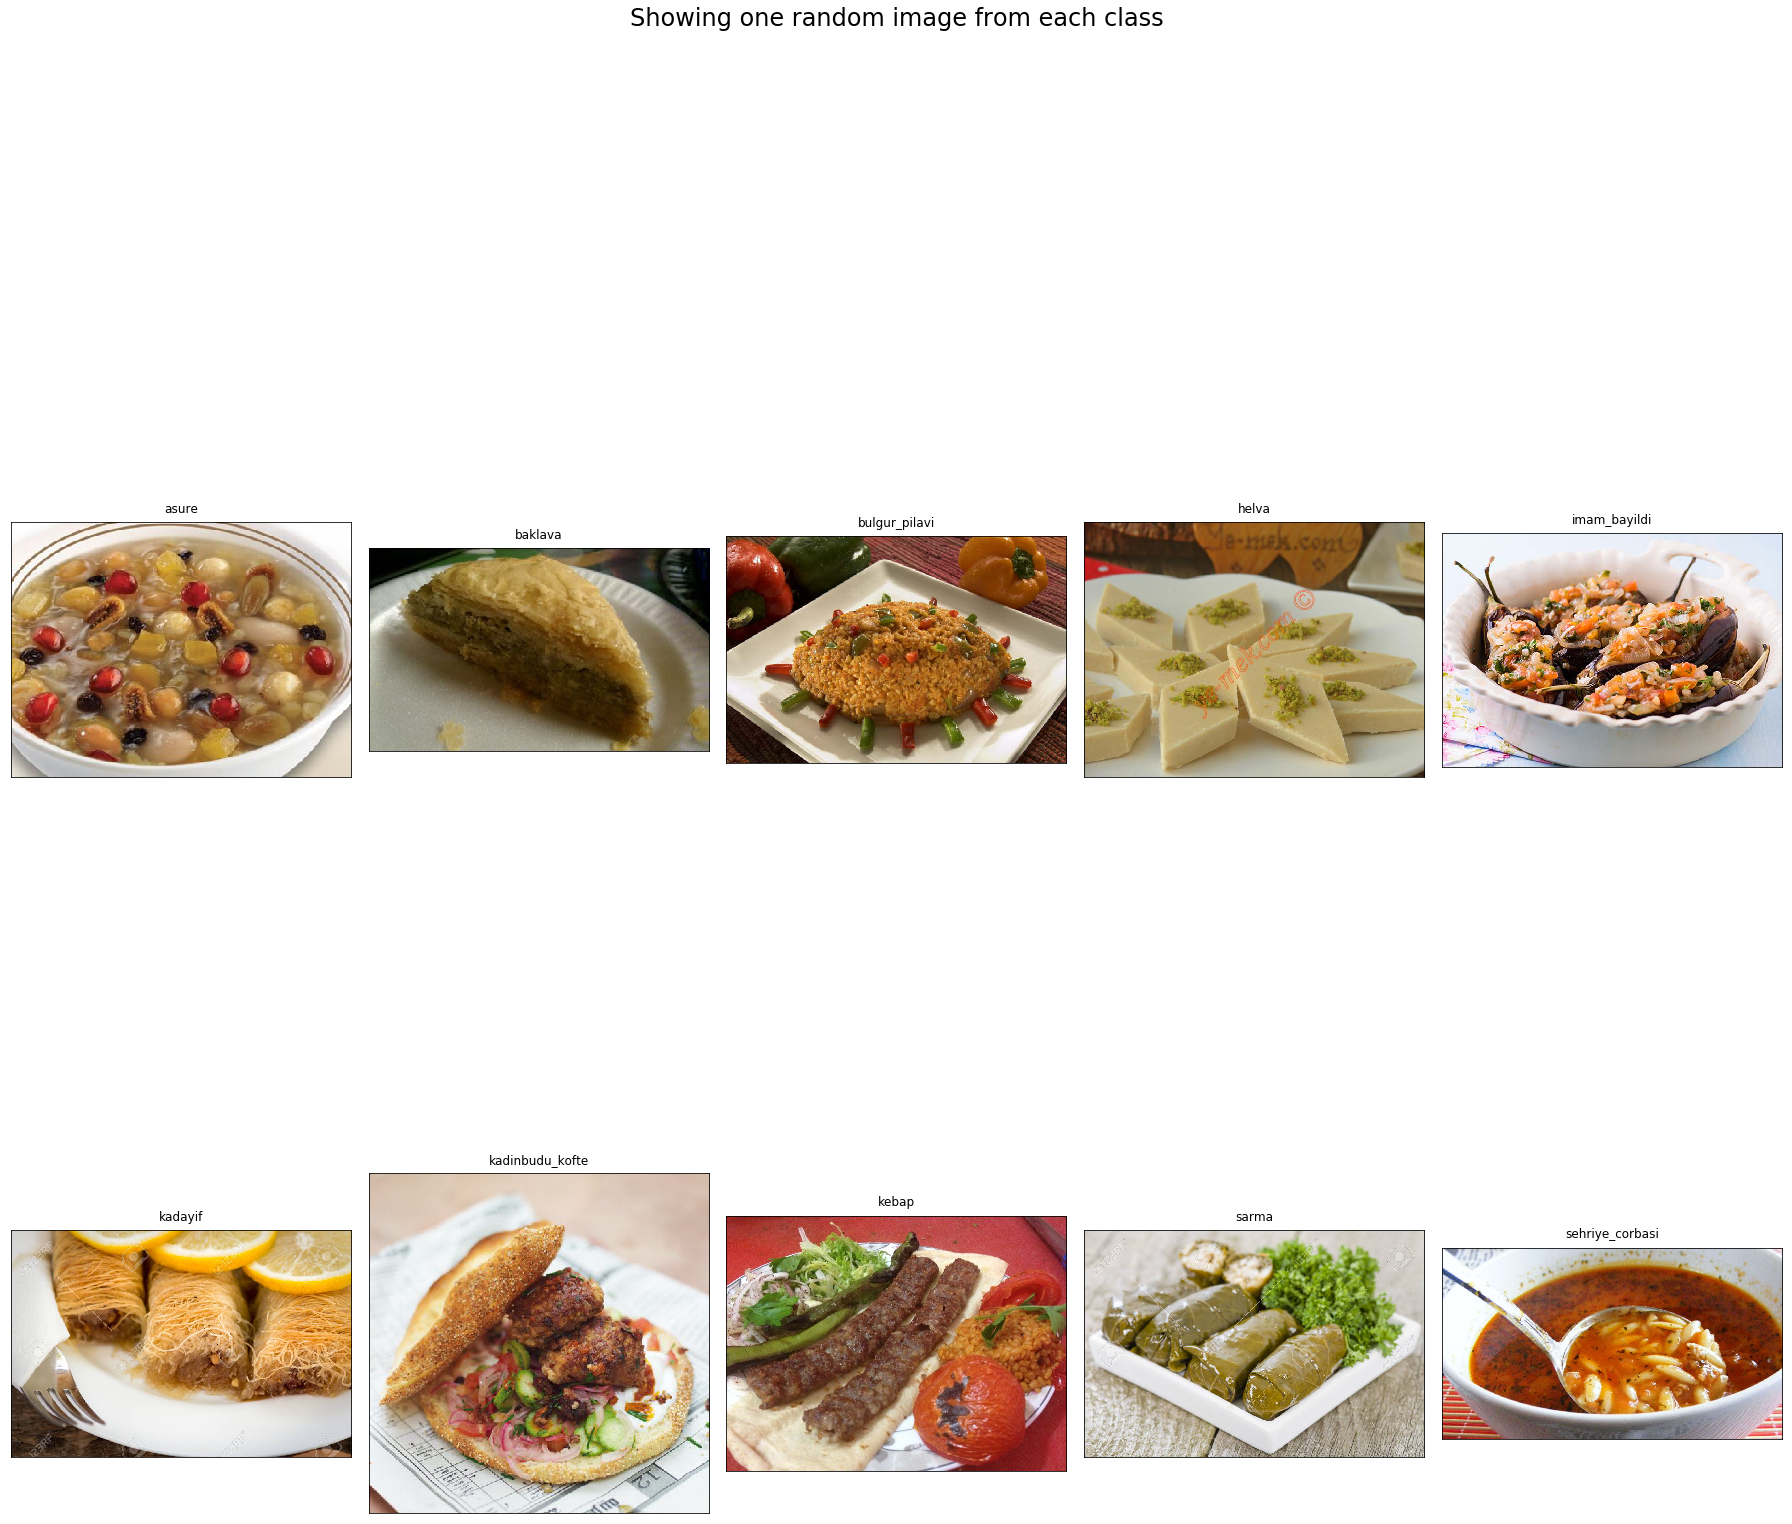

In [11]:
rows = 2
cols = 5
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "./turkish-food/images"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':
        continue
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()

In [12]:
food_list = ['asure','baklava','bulgur_pilavi','helva','imam_bayildi','kadayif','kadinbudu_kofte','kebap','sarma','sehriye_corbasi']

In [13]:
src_train = 'train'
src_test = 'test'

In [15]:
K.clear_session()
n_classes = 10
img_width, img_height = 299, 299
train_data_dir = src_train
validation_data_dir = src_test
nb_train_samples = 2000 #75750
nb_validation_samples = 500 #25250
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(10,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_10class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_10class.log')

history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=30,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('model_trained_10class.hdf5')

Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 69/125 [===============>..............] - ETA: 43s - loss: 2.4481 - acc: 0.1123

C:\Users\furka\Anaconda3\envs\capstone\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 12 bytes but only got 10. Skipping tag 42037
  " Skipping tag %s" % (size, len(data), tag))


32/32 [==============================] - 12s 376ms/step - loss: 2.1625 - acc: 0.3200

Epoch 00001: val_loss improved from inf to 2.16248, saving model to best_model_10class.hdf5
125/125 [==============================] - 137s 1s/step - loss: 2.3733 - acc: 0.1610 - val_loss: 2.1625 - val_acc: 0.3200
Epoch 2/30
32/32 [==============================] - 13s 410ms/step - loss: 1.8559 - acc: 0.5940

Epoch 00002: val_loss improved from 2.16248 to 1.85586, saving model to best_model_10class.hdf5
125/125 [==============================] - 99s 792ms/step - loss: 2.0667 - acc: 0.3920 - val_loss: 1.8559 - val_acc: 0.5940
Epoch 3/30
32/32 [==============================] - 14s 427ms/step - loss: 1.4904 - acc: 0.7200

Epoch 00003: val_loss improved from 1.85586 to 1.49040, saving model to best_model_10class.hdf5
125/125 [==============================] - 107s 853ms/step - loss: 1.7216 - acc: 0.5850 - val_loss: 1.4904 - val_acc: 0.7200
Epoch 4/30
32/32 [==============================] - 36s 1s/step -

125/125 [==============================] - 239s 2s/step - loss: 0.2239 - acc: 0.9690 - val_loss: 0.2953 - val_acc: 0.9360
Epoch 28/30
32/32 [==============================] - 31s 977ms/step - loss: 0.2932 - acc: 0.9360

Epoch 00028: val_loss improved from 0.29529 to 0.29321, saving model to best_model_10class.hdf5
125/125 [==============================] - 239s 2s/step - loss: 0.2196 - acc: 0.9695 - val_loss: 0.2932 - val_acc: 0.9360
Epoch 29/30
32/32 [==============================] - 11s 352ms/step - loss: 0.2900 - acc: 0.9360

Epoch 00029: val_loss improved from 0.29321 to 0.29003, saving model to best_model_10class.hdf5
125/125 [==============================] - 147s 1s/step - loss: 0.2278 - acc: 0.9630 - val_loss: 0.2900 - val_acc: 0.9360
Epoch 30/30
32/32 [==============================] - 11s 347ms/step - loss: 0.2922 - acc: 0.9360

Epoch 00030: val_loss did not improve from 0.29003
125/125 [==============================] - 94s 756ms/step - loss: 0.2060 - acc: 0.9745 - val_loss

In [16]:
class_map_10 = train_generator.class_indices
class_map_10

{'asure': 0,
 'baklava': 1,
 'bulgur_pilavi': 2,
 'helva': 3,
 'imam_bayildi': 4,
 'kadayif': 5,
 'kadinbudu_kofte': 6,
 'kebap': 7,
 'sarma': 8,
 'sehriye_corbasi': 9}

In [17]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

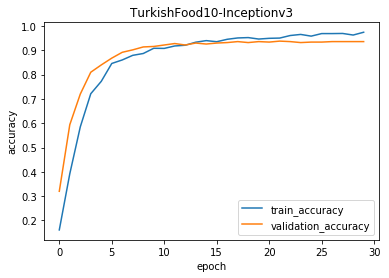

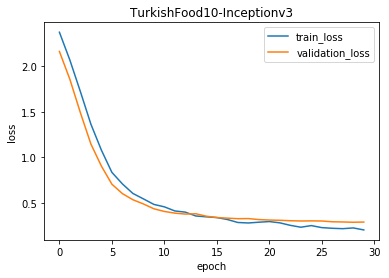

In [18]:
plot_accuracy(history,'TurkishFood10-Inceptionv3')
plot_loss(history,'TurkishFood10-Inceptionv3')

In [30]:
K.clear_session()
model_best = load_model('best_model_10class.hdf5',compile = False)

In [31]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

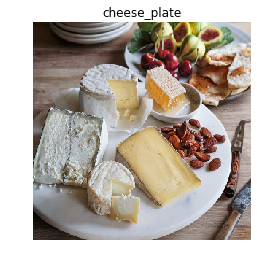

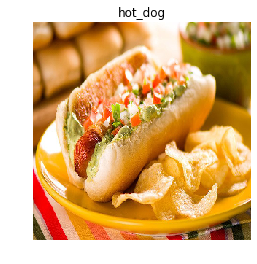

In [34]:
images = []
images.append('cheese.jpg')
images.append('hotdog.jpg')
predict_class(model_best, images, True)